In [1]:
#!pip install tensorflow==2.0.0-alpha0
import tensorflow as tf

print("\nTensorflow Version:", tf.__version__)


Tensorflow Version: 1.14.0


In [2]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [4]:
from keras.utils import np_utils

Using TensorFlow backend.


In [5]:
print('\nKeras Version:', keras.__version__)


Keras Version: 2.2.4-tf


In [6]:
tf.compat.v1.keras.wrappers.scikit_learn.KerasClassifier #para que ande el #from tensorflow.keras.utils import np_utils

tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier

In [7]:
raw_df = pd.read_csv("/Users/luciananieto/Desktop/1_2019/Finals_2017/data_2017.csv")
raw_df.columns
raw_df.head()
#scale_mapper = {'IV1':1,'IV2':2,'EV':3,'LV':4,'ER':5, 'LR1':6, 'LR2':7,'LR3':8,'H':9} 
#raw_df['GS'] = raw_df['GrowthStage'].replace(scale_mapper)
#raw_df=raw_df.drop(['GrowthStage'],axis=1)
raw_df.columns

Index(['B1', 'B10', 'B11', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'EVI', 'GCVI',
       'GVMI', 'ID', 'NDVI', 'NDWI', 'OBJECTID', 'constant', 'latitude',
       'longitude', 'mean', 'pr', 'tmmn', 'tmmx', 'vpd', 'GrowthStage',
       'GrowthDOY'],
      dtype='object')

In [8]:
raw_df=raw_df.drop(["B1",'OBJECTID', 'mean', 'EVI', 'GCVI',
       'GVMI', 'ID', 'NDVI', 'NDWI','pr', 'tmmn', 'tmmx', 'vpd','ID','latitude',
       'longitude','constant'],axis=1)
raw_df.columns

Index(['B10', 'B11', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'GrowthStage',
       'GrowthDOY'],
      dtype='object')

In [9]:
X=raw_df.drop(['GrowthStage'], axis=1)
X=np.array(X)
Y=raw_df["GrowthStage"]

In [10]:
raw_df['GrowthStage'].value_counts()

IV2    1959
LR3    1686
LR1    1666
LR2     845
EV      702
LV      663
IV1     646
ER      445
H       210
Name: GrowthStage, dtype: int64

In [11]:
raw_df.corr()

,B10,B11,B2,B3,B4,B5,B6,B7,GrowthDOY
B10,1.000000,0.992794,0.715533,0.684770,0.681294,-0.379301,0.757265,0.802449,-0.014311
B11,0.992794,1.000000,0.674204,0.642582,0.640678,-0.377877,0.717076,0.770635,-0.012819
B2,0.715533,0.674204,1.000000,0.983620,0.972830,-0.314055,0.957587,0.960561,-0.017605
B3,0.684770,0.642582,0.983620,1.000000,0.981008,-0.252062,0.948829,0.938692,-0.024344
B4,0.681294,0.640678,0.972830,0.981008,1.000000,-0.353576,0.952458,0.940075,-0.013282
B5,-0.379301,-0.377877,-0.314055,-0.252062,-0.353576,1.000000,-0.316722,-0.393951,-0.038617
B6,0.757265,0.717076,0.957587,0.948829,0.952458,-0.316722,1.000000,0.976806,-0.018105
B7,0.802449,0.770635,0.960561,0.938692,0.940075,-0.393951,0.976806,1.000000,-0.013022
GrowthDOY,-0.014311,-0.012819,-0.017605,-0.024344,-0.013282,-0.038617,-0.018105,-0.013022,1.000000


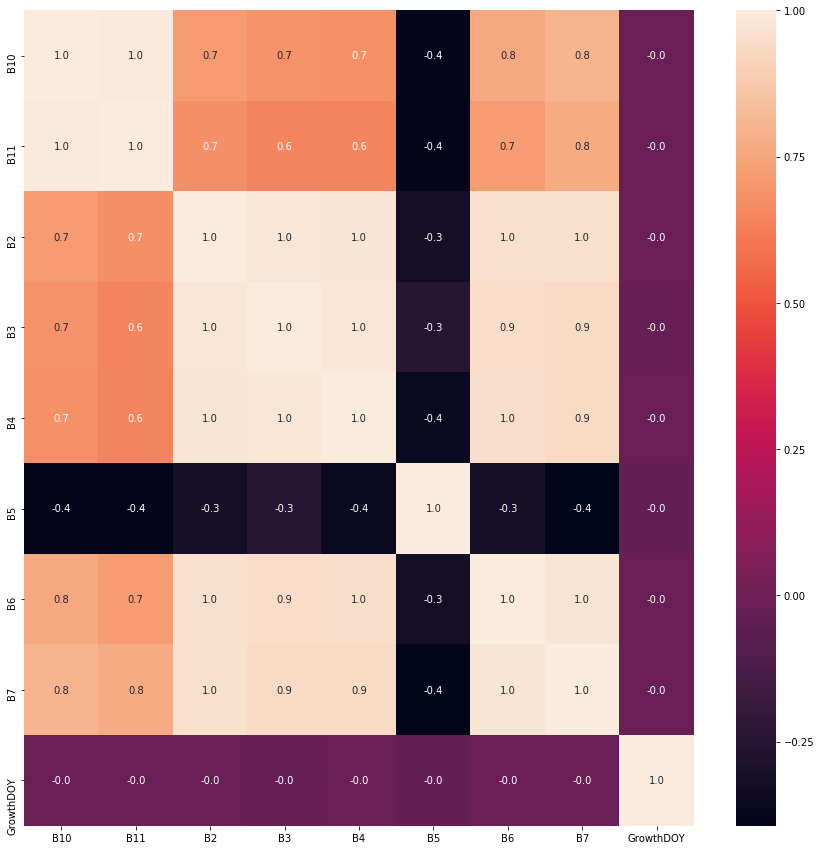

In [12]:
f, ax = plt.subplots(figsize=(15, 15))
corr = raw_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".1f")

In [13]:
encoder=LabelEncoder()
encoder.fit(Y)
Y=encoder.transform(Y)
Y=np_utils.to_categorical(Y, num_classes=9)
print(Y)


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [14]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.2, random_state=48)

In [15]:
print(train_y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
input_dim = len(raw_df.columns)-1

model=Sequential()

model.add(Dense(36,input_dim=input_dim, activation="relu"))
model.add(Dense(38, activation ="relu"))
model.add(Dense(38, activation ="relu"))
model.add(Dense(38, activation ="relu"))
model.add(Dense(9, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(train_x, train_y, epochs=25, batch_size=5)

scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/25
7057/7057 [==============================] - 2s 332us/sample - loss: 2.1141 - acc: 0.2708
Epoch 2/25
7057/7057 [==============================] - 2s 298us/sample - loss: 1.4523 - acc: 0.4785
Epoch 3/25
7057/7057 [==============================] - 2s 300us/sample - loss: 1.1791 - acc: 0.5380
Epoch 4/25
7057/7057 [==============================] - 2s 315us/sample - loss: 1.0848 - acc: 0.5752
Epoch 5/25
7057/7057 [==============================] - 2s 306us/sample - loss: 1.0412 - acc: 0.5878
Epoch 6/25
7057/7057 [==============================] - 2s 309us/sample - loss: 1.0130 - acc: 0.5943
Epoch 7/25
7057/7057 [==============================] - 2s 299us/sample - loss: 0.9592 - acc: 0.6202
Epoch 8/25
7057/7057 [==============================] - 2s 301us/sample - loss: 0.9551 - acc: 0.6178
Epoch 9/25
7057/7057 [==============================] - 2s 309us/sample - 

In [17]:
input_dim = len(raw_df.columns)-1

model=Sequential()

model.add(Flatten()),
model.add(Dense(36, activation="relu", input_shape=(19,)))
model.add(Dense(36, activation ="relu"))
model.add(Dense(36,activation ="relu"))
model.add(Dense(9, 
                activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10, batch_size=10)

scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


Epoch 1/10
7057/7057 [==============================] - 1s 173us/sample - loss: 2.5831 - acc: 0.2242
Epoch 2/10
7057/7057 [==============================] - 1s 138us/sample - loss: 1.8498 - acc: 0.3503
Epoch 3/10
7057/7057 [==============================] - 1s 135us/sample - loss: 1.5023 - acc: 0.4590
Epoch 4/10
7057/7057 [==============================] - 1s 132us/sample - loss: 1.2719 - acc: 0.5219
Epoch 5/10
7057/7057 [==============================] - 1s 134us/sample - loss: 1.1597 - acc: 0.5599
Epoch 6/10
7057/7057 [==============================] - 1s 132us/sample - loss: 1.1005 - acc: 0.5728
Epoch 7/10
7057/7057 [==============================] - 1s 142us/sample - loss: 1.0143 - acc: 0.6080
Epoch 8/10
7057/7057 [==============================] - 1s 137us/sample - loss: 0.9837 - acc: 0.6129
Epoch 9/10
7057/7057 [==============================] - 1s 132us/sample - loss: 0.9668 - acc: 0.6202
Epoch 10/10
1765/1765 [==============================] - 0s 56us/sample - loss: 0.8658 - ac

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  360       
_________________________________________________________________
dense_6 (Dense)              multiple                  1332      
_________________________________________________________________
dense_7 (Dense)              multiple                  1332      
_________________________________________________________________
dense_8 (Dense)              multiple                  333       
Total params: 3,357
Trainable params: 3,357
Non-trainable params: 0
_________________________________________________________________


In [19]:
GrowthStages= ['IV1','IV2','EV','LV','ER', 'LR1', 'LR2','LR3','H'] 

In [20]:

pred = model.predict(test_x)
pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

In [21]:
from sklearn import metrics

y_compare = np.argmax(test_y,axis=1) 
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.6810198300283287


In [22]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(GrowthStages))
    plt.xticks(tick_marks, GrowthStages, rotation=45)
    plt.yticks(tick_marks, GrowthStages)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 23   0   0   0   0  47   0   0  29]
 [  0  15   0   0  78   0   0   0  26]
 [  0   0   0   0   0  19   0  24   0]
 [  0   0   0  95  35   0   0   0   2]
 [  0   4   0  12 369   0   0   0   8]
 [ 15   0   0   0   0 326   0  14   2]
 [  0   0   0   0   0 146   0  16   0]
 [  0   0   0   0   0  65   0 264   0]
 [  6   7   0   0   6   2   0   0 110]]
Normalized confusion matrix
[[0.23 0.   0.   0.   0.   0.47 0.   0.   0.29]
 [0.   0.13 0.   0.   0.66 0.   0.   0.   0.22]
 [0.   0.   0.   0.   0.   0.44 0.   0.56 0.  ]
 [0.   0.   0.   0.72 0.27 0.   0.   0.   0.02]
 [0.   0.01 0.   0.03 0.94 0.   0.   0.   0.02]
 [0.04 0.   0.   0.   0.   0.91 0.   0.04 0.01]
 [0.   0.   0.   0.   0.   0.9  0.   0.1  0.  ]
 [0.   0.   0.   0.   0.   0.2  0.   0.8  0.  ]
 [0.05 0.05 0.   0.   0.05 0.02 0.   0.   0.84]]


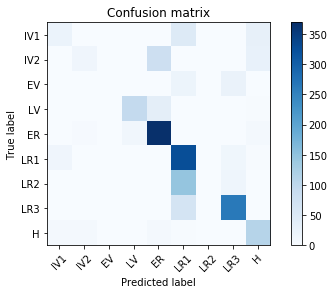

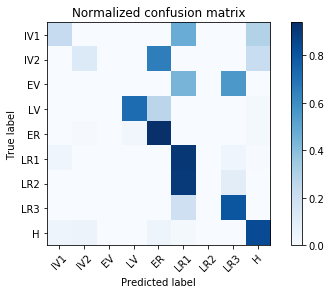

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, GrowthStages)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, GrowthStages, title='Normalized confusion matrix')

plt.show()

In [24]:
import numpy as np
from sklearn.metrics import classification_report

# Compute confusion matrix
cr = classification_report(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cr)

Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.52      0.23      0.32        99
           1       0.58      0.13      0.21       119
           2       0.00      0.00      0.00        43
           3       0.89      0.72      0.79       132
           4       0.76      0.94      0.84       393
           5       0.54      0.91      0.68       357
           6       0.00      0.00      0.00       162
           7       0.83      0.80      0.82       329
           8       0.62      0.84      0.71       131

    accuracy                           0.68      1765
   macro avg       0.53      0.51      0.49      1765
weighted avg       0.61      0.68      0.62      1765



/Users/luciananieto/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
